In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact,Dropdown, FloatSlider
from traitlets import directional_link
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [4]:
df_red = pd.read_csv('winequality-red.csv',sep=';')
df_white = pd.read_csv('winequality-white.csv',sep=';')

In [5]:
df_red["type"] = 'red'

In [6]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
df_white["type"] = 'white'

In [8]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [9]:
df = pd.concat([df_red, df_white], axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [11]:
# Renaming columns:
for col in df.columns:
    if col != 'pH':
        df.rename(columns={col:col.capitalize()}, inplace=True)

In [12]:
df.head()

,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
df = df.reset_index(drop=True)

In [14]:
# Searching for null values if present
for column in df.columns:
    missing = df[column].isna().sum() / df.shape[0]
    print(f"{column:{21}}: ==============> {missing * 100:.2f}%")

Fixed acidity        : ==============> 0.00%
Volatile acidity     : ==============> 0.00%
Citric acid          : ==============> 0.00%
Residual sugar       : ==============> 0.00%
Chlorides            : ==============> 0.00%
Free sulfur dioxide  : ==============> 0.00%
Total sulfur dioxide : ==============> 0.00%
Density              : ==============> 0.00%
pH                   : ==============> 0.00%
Sulphates            : ==============> 0.00%
Alcohol              : ==============> 0.00%
Quality              : ==============> 0.00%
Type                 : ==============> 0.00%


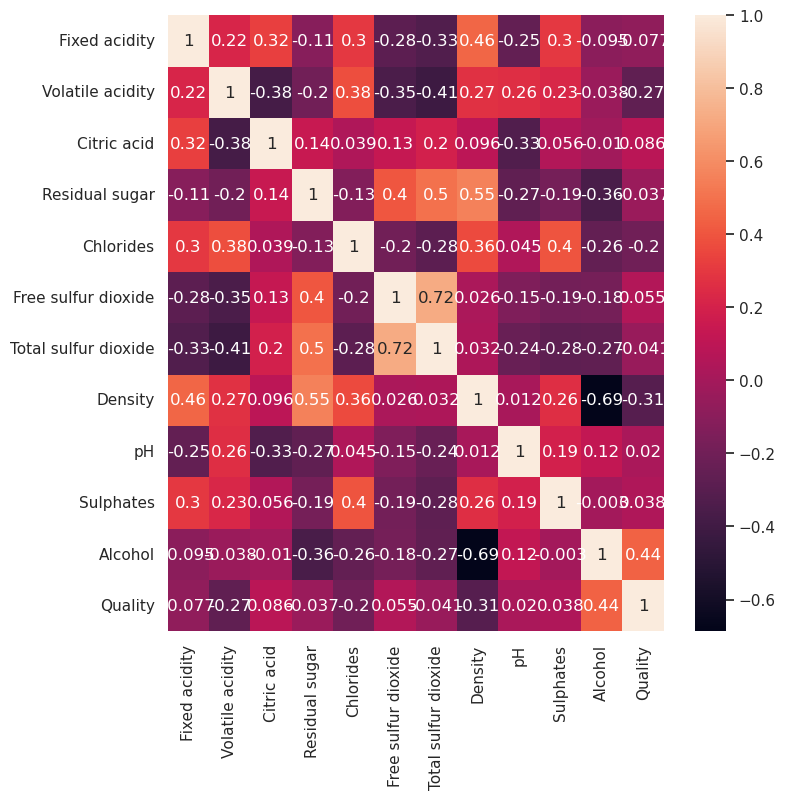

In [15]:
# Correlation between features
corr_matrix = df.corr()
plt.figure(figsize = (8,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
# Detailed analysis of correlations between data
numerical_columns = [column for column in df.columns if df[column].dtype == "float"]
numerical_columns

['Fixed acidity',
 'Volatile acidity',
 'Citric acid',
 'Residual sugar',
 'Chlorides',
 'Free sulfur dioxide',
 'Total sulfur dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol']

In [17]:
categorical_columns = [column for column in df.columns if df[column].dtype in ["object", "int64"]]
categorical_columns

['Quality', 'Type']

In [20]:
def cat_data_analysis(df):

    categorical_menu = widgets.Dropdown(options=categorical_columns,
                                        value=categorical_columns[0],
                                        description="Column: ")

    opt1_values = sorted([str(x) for x in df[categorical_menu.value].unique()])
    opt1_values.append('all') 

    opt1 = widgets.Dropdown(options=opt1_values,
                            value='all',
                            description="Options: ")

    categorical_menu_hue = widgets.Dropdown(options=categorical_columns,
                                            value=categorical_columns[1],
                                            description="Hue: ")

    opt2_values = sorted([str(x) for x in df[categorical_menu_hue.value].unique()])
    opt2_values.append('all')

    opt2 = widgets.Dropdown(options=opt2_values,
                            value='all',
                            description="Options: ")

    box1 = widgets.VBox([categorical_menu,opt1])
    box2 = widgets.VBox([categorical_menu_hue,opt2])
    category_box = widgets.HBox([box1,box2])

    def draw_countplot_1(column,hue):
        p = sns.countplot(data=df, x=column, hue=hue)
        if len(df[column].unique()) > 4:
            p.tick_params(axis='x', rotation=90)
        plt.show()

    def draw_countplot_2(column,hue):
        p2 = sns.displot(data=df, x=column, hue=hue)
        plt.show()

    def update_dropdown1(change):

        opt1_options = sorted([str(x) for x in df[categorical_menu.value].unique()])
        opt1_options.append('all')
        opt1.options = opt1_options
        opt1.value = 'all'

    def update_dropdown2(change):

        opt2_options = sorted([str(x) for x in df[categorical_menu_hue.value].unique()])
        opt2_options.append('all')
        opt2.options = opt2_options
        opt2.value = 'all'
    
    categorical_menu.observe(update_dropdown1, names='value')
    categorical_menu_hue.observe(update_dropdown2,names='value')
    
    out = widgets.interactive_output(draw_countplot_1,{'column':categorical_menu,'hue':categorical_menu_hue})
    out2 = widgets.interactive_output(draw_countplot_2,{'column':categorical_menu,'hue':categorical_menu_hue})
    cat_box_out = widgets.HBox([out,out2])
    display(category_box,cat_box_out)


In [21]:
cat_data_analysis(df)

In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [32]:
def num_data_analysis(df):
    
    n1 = widgets.Dropdown(options=numerical_columns,
                    value = numerical_columns[0],
                    description="Column 1: ")

    n2 = widgets.Dropdown(options=numerical_columns,
                        value = numerical_columns[1],
                        description="Column 2: ")

    n3 = widgets.Dropdown(options=categorical_columns,
                                    description="Hue: ")

    d3_options = sorted([str(x) for x in df[n3.value].unique()])
    d3_options.append('all')

    d3 = widgets.Dropdown(options=d3_options,
                        value="all",
                        description="Options: ")

    s1 = widgets.FloatRangeSlider(min = df[n1.value].min(), max = df[n1.value].max(), value=(df[n1.value].min(), df[n1.value].max()),  description='Value range: ')
    s2 = widgets.FloatRangeSlider(min = df[n2.value].min(), max = df[n2.value].max(), value=(df[n2.value].min(), df[n2.value].max()), description='Value range: ')
    n1_box = widgets.VBox([n1,s1])
    n2_box = widgets.VBox([n2,s2])
    n3_box = widgets.VBox([n3,d3])
    numeric_box = widgets.HBox([n1_box,n2_box,n3_box])

    def data_filter(column1,column2,hue,slider1,slider2,dropdown3):


        filtered_data = df[(df[column1] < slider1[1]+0.01) & (df[column1] >= slider1[0])
                        & (df[column2] >= slider2[0]) & (df[column2] < slider2[1]+0.01)]
                        
        if dropdown3 == 'all':
            filtered_data
        else:
            if hue =='Type':
                filtered_data = filtered_data[filtered_data[hue]==dropdown3]
            else:
                filtered_data = filtered_data[filtered_data[hue]==int(dropdown3)]

        return filtered_data
    
    def draw_plot2(column1,column2,hue,slider1,slider2,dropdown3):
        
        filtered_data = data_filter(column1,column2,hue,slider1,slider2,dropdown3)
        
        print(f"""
        Correlation coefficient: {filtered_data[column1].corr(filtered_data[column2]):.3f}
        {column1} mean value: {filtered_data[column1].mean():.2f}
        {column2} mean value: {filtered_data[column2].mean():.2f}""")

        if dropdown3 == 'all':

            fig, axes = plt.subplots(1, 2,figsize=(10, 5))
            fig.suptitle(f'Data distribution for wines of different {hue.lower()}')
            sns.boxplot(data=filtered_data, x=hue, y=column1,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[0])
            sns.boxplot(data=filtered_data, x=hue, y=column2,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[1])
            plt.show()

        else:
            if hue=='Type':
                fig, axes = plt.subplots(1, 2,figsize=(10, 5))
                fig.suptitle(f'Data distribution for {dropdown3} wines of different quality')
                sns.boxplot(data=filtered_data, x='Quality', y=column1,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[0])
                sns.boxplot(data=filtered_data, x='Quality', y=column2,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[1])
                plt.show()

            else:
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                fig.suptitle(f'Data distribution for {dropdown3} quality wines of different type')
                sns.boxplot(data=filtered_data, x='Type', y=column1,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[0])
                sns.boxplot(data=filtered_data, x='Type', y=column2,showmeans=True,meanprops={"markeredgecolor": "yellow"},ax=axes[1])
                plt.show()


    def draw_plot1(column1,column2,hue,slider1,slider2,dropdown3):
        
        filtered_data = data_filter(column1,column2,hue,slider1,slider2,dropdown3)
        print(f"""
        Correlation coefficient: {filtered_data[column1].corr(filtered_data[column2]):.3f}
        {column1} mean value: {filtered_data[column1].mean():.2f}
        {column2} mean value: {filtered_data[column2].mean():.2f}""")

        if dropdown3 == 'all':
            p = sns.jointplot(data=filtered_data,x=column1,y=column2,hue=hue)
            p.fig.suptitle(f"Relationship between the '{column1.lower()}' and '{column2.lower()}'\n variables for wines of different {hue.lower()}")
            p.fig.tight_layout()
            p.fig.subplots_adjust(top=0.90)
            plt.show()
            
        else:
            if hue == 'Quality':

                p = sns.jointplot(data=filtered_data,x=column1,y=column2,hue='Type')
                p.fig.suptitle(f"Relationship between the '{column1.lower()}' and '{column2.lower()}'\n variables for wines of different types")
                p.fig.tight_layout()
                p.fig.subplots_adjust(top=0.90)
                plt.show()
            else:
                p = sns.jointplot(data=filtered_data,x=column1,y=column2,hue='Quality')
                p.fig.suptitle(f"Relationship between the '{column1.lower()}' and '{column2.lower()}'\n variables for wines of different quality")
                p.fig.tight_layout()
                p.fig.subplots_adjust(top=0.90)
                plt.show()
                
                
    def update_slider1(change):

        s1.min = 0
        s1.max =1000
        s1.max=df[n1.value].max()
        s1.min = df[n1.value].min()
        s1.value = (df[n1.value].min(), df[n1.value].max())
        
    def update_slider2(change):
        
        s2.min = 0
        s2.max =1000
        s2.max=df[n2.value].max()
        s2.min = df[n2.value].min()
        s2.value = (df[n2.value].min(),df[n2.value].max())
    
    def update_dropdown3(change):

        d3_options = sorted([str(x) for x in df[n3.value].unique()])
        d3_options.append('all')
        d3.options=d3_options
        d3.value = 'all'
    
    n1.observe(update_slider1, names='value')
    n2.observe(update_slider2,names='value')
    n3.observe(update_dropdown3,names='value')
    
    out = widgets.interactive_output(draw_plot1,{'column1':n1, 'column2': n2,'hue':n3, 'slider1':s1,'slider2':s2,'dropdown3':d3})
    out2 = widgets.interactive_output(draw_plot2,{'column1':n1, 'column2': n2,'hue':n3, 'slider1':s1,'slider2':s2,'dropdown3':d3})
    
    num_box_out = widgets.HBox([out,out2])
    display(numeric_box, num_box_out)

In [33]:
num_data_analysis(df)

In [29]:
import plotly.express as px
n1 = widgets.Dropdown(options=numerical_columns,
                    value = numerical_columns[0],
                    description="Column 1: ")

n2 = widgets.Dropdown(options=numerical_columns,
                        value = numerical_columns[1],
                        description="Column 2: ")

n3 = widgets.Dropdown(options=categorical_columns,
                                    description="Hue: ")

def draw_interactive_plot(column1,column2,hue):
    p = px.scatter(df, x=column1, y=column2, color=hue, trendline="ols", marginal_x="violin", marginal_y="box",width=700, height=700, opacity=0.5)
    p.show()

out = widgets.interactive_output(draw_interactive_plot,{'column1':n1, 'column2': n2,'hue':n3})
display(n1,n2,n3,out)


Dropdown(description='Column 1: ', options=('Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual suga…

Dropdown(description='Column 2: ', index=1, options=('Fixed acidity', 'Volatile acidity', 'Citric acid', 'Resi…

Dropdown(description='Hue: ', options=('Quality', 'Type'), value='Quality')

Output()

In [71]:
df['total sulfur dioxide'].max()


440.0

In [114]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed acidity         6497 non-null   float64
 1   Volatile acidity      6497 non-null   float64
 2   Citric acid           6497 non-null   float64
 3   Residual sugar        6497 non-null   float64
 4   Chlorides             6497 non-null   float64
 5   Free sulfur dioxide   6497 non-null   float64
 6   Total sulfur dioxide  6497 non-null   float64
 7   Density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   Sulphates             6497 non-null   float64
 10  Alcohol               6497 non-null   float64
 11  Quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
# Figures with Plotly

In [55]:

#labels
lab = df["Type"].value_counts().keys().tolist()
lab_2 = df["Quality"].value_counts().keys().tolist()
#values
val = df["Type"].value_counts().values.tolist()
val_2 = df["Quality"].value_counts().values.tolist()
trace = go.Pie(labels=lab, 
                values=val, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
trace_2 = go.Pie(labels=lab_2, 
                values=val_2, 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )

data = [trace]
data_2 = [trace_2]
layout = go.Layout(title="Wine types")
layout_2 = go.Layout(title="Wine quality")
fig = go.Figure(data = data,layout = layout)
fig_2 = go.Figure(data = data_2,layout = layout_2)
iplot(fig)
iplot(fig_2)

In [56]:
# Histogram
# defining data
trace = go.Histogram(x=df['Alcohol'],nbinsx=15,histnorm='percent')
data = [trace]# defining layout
layout = go.Layout(title="Alcohol distribution")# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [57]:
# Scatter plot

#defining data
trace = go.Scatter(x = df['Density'],y=df['Fixed acidity'],text = df['Quality'],mode='markers')
data=[trace]
#defining layout
layout = go.Layout(title='Density vs Fixed acidity',xaxis=dict(title='Density'),yaxis=dict(title='Fixed acidity'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

In [136]:
y=[]
density = []
sugar = []
for i in list(df['Quality'].unique()):
    alcohol = df[df['Quality']==i]['Alcohol'].mean()
    densities = df[df['Quality']==i]['Density'].mean()
    residual_sugar = df[df['Quality']==i]['Residual sugar'].mean()
    y.append(alcohol)
    sugar.append(round(residual_sugar,3))
    density.append(densities)

#defining data
trace = go.Bar(x = list(df['Quality'].unique()),y=y, marker=dict(color=density,colorscale='Viridis',showscale=True), text=sugar)
data=[trace]
#defining layout
layout = go.Layout(title='Alcohol/density vs wine quality',xaxis=dict(title='Wine quality'),yaxis=dict(title='Alcohol'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

In [59]:
#defining data
data=[
    go.Scatter(x = df['Total sulfur dioxide'],
                y=df['Volatile acidity'],
                text=df['Type'],
                mode='markers',
                marker=dict(size=df['Alcohol'], color=df['Quality'],showscale=True),
              )]
#defining layout
layout = go.Layout(title='Volatile acidity vs alcohol with quality and wine type',xaxis=dict(title='Total sulfur dioxide'),yaxis=dict(title='Volatile acidity'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

In [60]:
#all plotly
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
#others
import pandas as pd
import numpy as np

In [ ]:
#Distrubution chart with dropdown menu

In [63]:
import plotly.express as px
px.scatter(df, x="Alcohol", y="Density", color="Type", trendline="ols", marginal_x="violin", marginal_y="box",width=700, height=700, opacity=0.5)

In [53]:
px.scatter_matrix(df, dimensions={"Fixed acidity","Volatile acidity","Citric acid","Residual sugar", "Chlorides"}, color="Quality")

In [2]:
def print_hist_plotly(df:pd.DataFrame):
# defining list_updatemenus
  n1 = widgets.Dropdown(options=numerical_columns,
                      value = numerical_columns[0],
                      description="Column: ")
  

#     n2 = widgets.Dropdown(options=numerical_columns,
#                         value = numerical_columns[1],
#                         description="Column 2: ")
  def draw_plot(column):
    
    n1.value = column
    list_updatemenus = [{'label': "Type",
      'method': 'update',
      'args': [{'visible': [True, True, False, False, False, False,False, False, False]}, {'title': 'Distribution of alcohol for wine type'}]},
    {'label': 'Quality',
      'method': 'update',
      'args': [{'visible': [False, False, True, True, True, True,True, True, True]}, {'title': 'Distribution of alcohol for wine quality'}]}]
    # defining graph objects
    # defining all graph objects
    x_white = df[df['Type']=='white'][n1.value]
    x_red = df[df['Type']=='red'][n1.value]
    x_3= df[df['Quality']==3][n1.value]
    x_4= df[df['Quality']==4][n1.value]
    x_5= df[df['Quality']==5][n1.value]
    x_6= df[df['Quality']==6][n1.value]
    x_7= df[df['Quality']==7][n1.value]
    x_8= df[df['Quality']==8][n1.value]
    x_9= df[df['Quality']==9][n1.value]
    # defining data
    data=[go.Histogram(x=x_white,name='white', opacity = .5),
        go.Histogram(x=x_red,name='red',opacity = .5),
        go.Histogram(x=x_3,name='3',opacity = .5),
        go.Histogram(x=x_4,name='4',opacity = .5),
        go.Histogram(x=x_5,name='5',opacity = .5),
        go.Histogram(x=x_6,name='6',opacity = .5),
        go.Histogram(x=x_7,name='7',opacity = .5),
        go.Histogram(x=x_8,name='8',opacity = .5),
        go.Histogram(x=x_9,name='9',opacity = .5)]
    # defining layout
    layout=go.Layout(title=f'Distribution of {n1.value} by type and quality',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='overlay')
    # defining layout and plotting
    fig = go.Figure(data,layout)
    fig.update_traces(marker_line_width=1,marker_line_color="white")
    iplot(fig)
  out = widgets.interactive_output(draw_plot,{'column':n1})  
  display(n1,out)
  
  

NameError: name 'pd' is not defined

In [1]:
print_hist_plotly(df)

NameError: name 'print_hist_plotly' is not defined

In [141]:
# Create figure
fig = go.Figure()# Create Graph Object for every increase of 2 years of Age
for step in np.arange(df['Alcohol'].min(), df['Alcohol'].max()+0.5,0.1):
    y=[]
    for i in list(df['Type'].unique()):
        result = df[df['Alcohol']<=step][df['Type']==i]["Type"].count()
        y.append(result)
    fig.add_trace(
        go.Bar(
            visible=False,
            x = list(df['Type'].unique()),
            y= y,
            name="Alcohol = " + str(step)))

In [88]:
#defining steps 
steps = []
for i in range(len(fig.data)):
    step = dict(
        label = str([i for i in np.arange(df['Alcohol'].min(), df['Alcohol'].max()+0.5,0.1)][i]),
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

#defining sliders
sliders = [dict(
    currentvalue={"prefix": "Alcohol less than "},
    active=1,
    steps=steps
)]

In [89]:
#defining layout and plotting 
fig.update_layout(
    title = 'Change of alcohol with wine type',
    yaxis=dict(title='Count of wines'),
    sliders=sliders
)
fig.show()